<a href="https://colab.research.google.com/github/AntonisZks/C-CPP-Data-Structures/blob/main/Pi_Calculating_Time_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PI and Fibonacci Sequence Calculations Time Statistics**

### Import Necessary Libraries

In [180]:
import matplotlib.pyplot as plt
from time import time
from typing import Callable, Any, Sequence

## Create a global variable that stores a specific time value

In [181]:
time_var: float = 0 # Time Variable

### Create a decorator to calculate the time spent for a given function to execute

In [182]:
def calculate_function_runtime(function: Callable) -> Callable:
    """ Decorator that calculates and prints the time spent for a function
        to run.
    Args:
        function (Callable): the given function.
    returns: a timer wrapper function.
    """
    def timer_wrapper(*args: Any, **kwargs: Any) -> Any:
        global time_var

        # Keep the time before and after the call of the function execution
        start_time: float = time()
        result: Any = function(*args, **kwargs)
        end_time: float = time()

        time_var = end_time - start_time
        return result

    return timer_wrapper

### **Create a Pi Calculator function**

In [194]:
@calculate_function_runtime
def calculate_pi(number_terms: int) -> float:
    """ Calculates the mathimatical number PI = 3.14, according to the given
        number of terms. The more terms are passed, the more accurate the result
        will be.
    Args:
        number_terms (int): the number of terms.
    returns: An value approximation to PI.
    """
    denominator: int = 1
    total_sum: float = 0.0

    for iterator in range(number_terms):
        if   iterator % 2 == 0: total_sum += 4 / denominator # Even index elements are positive
        elif iterator % 2 != 0: total_sum -= 4 / denominator # Odd index elements are negative

        denominator += 2 # Denominator is odd

    return total_sum

### Test the PI calculator function with different number of terms, and determin how much each case took

#### Create ploting functions

In [195]:
def plot_times(plt):
    """ Plots the calculations time graph """
    plt.plot(list(calculation_terms), times, marker='.', linewidth=3, markersize=10, color='dodgerblue')
    plt.set_xlabel("Terms")
    plt.set_ylabel("Time (Seconds)")
    plt.set_title("Calculations Time")
    plt.grid()

def plot_approximations(plt):
    """ Plots the calculations approximations graph """
    plt.plot(list(calculation_terms), approximations, marker='.', linewidth=3, markersize=10, color='green')
    plt.set_xlabel("Terms")
    plt.set_ylabel("PI Approximations")
    plt.set_title("Calculations Approximations")
    plt.grid()

#### Calculate the approximations and their time, and plot them

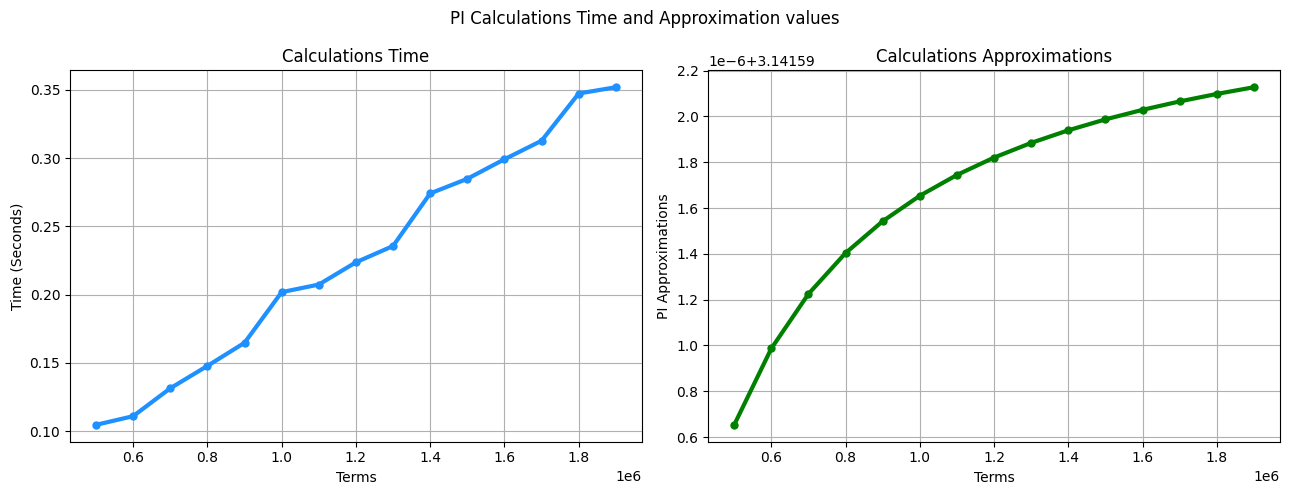

In [201]:
times: list[float] = []          # List that stores all the time spent for each calculation to be done
approximations: list[float] = [] # list of PI approximations after each calculation

calculation_terms: Sequence = list(range(500_000, 2_000_000, 100_000))
for number_terms in calculation_terms:
    pi: float = calculate_pi(number_terms)
    times.append(time_var)
    approximations.append(pi)

# Ploting the results
plt.style.use("default")
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

plot_times(axs[0])
plot_approximations(axs[1])

fig.suptitle("PI Calculations Time and Approximation values")
fig.tight_layout()

## **Create a fibonacci sequence calculator function**

In [186]:
@calculate_function_runtime
def fibonacci(term: int):
    return fibonacci_rec(term)

def fibonacci_rec(term: int):
    """ Calculates the given term of the fibonacci sequence, recursively
    Args:
        term (int): the fibonacci term to be calculated
    returns: the fibonacci value of the given term
    """
    if (term == 1 or term == 2):
        return 1
    else:
        return fibonacci_rec(term - 1) + fibonacci_rec(term - 2)

## Test the fibonacci calculator function

In [187]:
for term in range(30, 36):
    print(f"Fibonacci({term}) = {fibonacci(term)}")

Fibonacci(30) = 832040
Fibonacci(31) = 1346269
Fibonacci(32) = 2178309
Fibonacci(33) = 3524578
Fibonacci(34) = 5702887
Fibonacci(35) = 9227465
